In [1]:
# Imports all packages necessary or useful

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import tree

In [2]:
# Opens our medical_clean data csv file for analysis

df = pd.read_csv(r"C:\Users\caleb\OneDrive\Desktop\WGU\D209 - Data Mining I\medical_clean.csv")

In [3]:
# Profiles our csv file following importing data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [4]:
# Gives us a snapshot of values contained in each of our variables

pd.set_option("display.max_columns", 0)
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [5]:
# Detects any duplicated observations in our data set

df.duplicated().value_counts()

False    10000
dtype: int64

In [6]:
# Detects any null values in our data set

df.isnull().sum()

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charg

In [7]:
# Explores variables we are interested in: ['Children']

df['Children'].value_counts()

0     2548
1     2509
3     1489
2     1475
4      995
7      213
8      209
6      191
5      169
9      108
10      94
Name: Children, dtype: int64

In [8]:
# Explores variables we are interested in: ['Age']

df['Age'].describe()

count    10000.000000
mean        53.511700
std         20.638538
min         18.000000
25%         36.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

In [9]:
# Explores variables we are interested in: ['Income']

df['Income'].describe()

count     10000.000000
mean      40490.495160
std       28521.153293
min         154.080000
25%       19598.775000
50%       33768.420000
75%       54296.402500
max      207249.100000
Name: Income, dtype: float64

In [10]:
# Explores variables we are interested in: ['Marital']

df['Marital'].value_counts()

Widowed          2045
Married          2023
Separated        1987
Never Married    1984
Divorced         1961
Name: Marital, dtype: int64

In [11]:
# Explores variables we are interested in: ['Gender']

df['Gender'].value_counts()

Female       5018
Male         4768
Nonbinary     214
Name: Gender, dtype: int64

In [12]:
# Explores variables we are interested in: ['ReAdmis']

df['ReAdmis'].value_counts()

No     6331
Yes    3669
Name: ReAdmis, dtype: int64

In [13]:
# Explores variables we are interested in: ['VitD_levels']

df['VitD_levels'].describe()

count    10000.000000
mean        17.964262
std          2.017231
min          9.806483
25%         16.626439
50%         17.951122
75%         19.347963
max         26.394449
Name: VitD_levels, dtype: float64

In [14]:
# Explores variables we are interested in: ['Initial_admin']

df['Initial_admin'].value_counts()

Emergency Admission      5060
Elective Admission       2504
Observation Admission    2436
Name: Initial_admin, dtype: int64

In [15]:
# Explores variables we are interested in: ['HighBlood']

df['HighBlood'].value_counts()

No     5910
Yes    4090
Name: HighBlood, dtype: int64

In [16]:
# Explores variables we are interested in: ['Stroke']

df['Stroke'].value_counts()

No     8007
Yes    1993
Name: Stroke, dtype: int64

In [17]:
# Explores variables we are interested in: ['Complication_risk']

df['Complication_risk'].value_counts()

Medium    4517
High      3358
Low       2125
Name: Complication_risk, dtype: int64

In [18]:
# Explores variables we are interested in: ['Overweight']

df['Overweight'].value_counts()

Yes    7094
No     2906
Name: Overweight, dtype: int64

In [19]:
# Explores variables we are interested in: ['Diabetes']

df['Diabetes'].value_counts()

No     7262
Yes    2738
Name: Diabetes, dtype: int64

In [20]:
# Explores variables we are interested in: ['Hyperlipidemia']

df['Hyperlipidemia'].value_counts()

No     6628
Yes    3372
Name: Hyperlipidemia, dtype: int64

In [21]:
# Explores variables we are interested in: ['BackPain']

df['BackPain'].value_counts()

No     5886
Yes    4114
Name: BackPain, dtype: int64

In [22]:
# Explores variables we are interested in: ['Anxiety']

df['Anxiety'].value_counts()

No     6785
Yes    3215
Name: Anxiety, dtype: int64

In [23]:
# Explores variables we are interested in: ['Asthma']

df['Asthma'].value_counts()

No     7107
Yes    2893
Name: Asthma, dtype: int64

In [24]:
# Explores variables we are interested in: ['Initial_days']
# NOTE: this variable is NOT included in our analysis because for someone to be readmitted, they MUST have been initially admitted; this will always be true for readmitted patients

df['Initial_days'].describe()

count    10000.000000
mean        34.455299
std         26.309341
min          1.001981
25%          7.896215
50%         35.836244
75%         61.161020
max         71.981490
Name: Initial_days, dtype: float64

In [25]:
# We will use our data to determine what patients may be at risk for readmission - ['ReAdmis']

In [26]:
# Categorical variables should be recast from objects for analysis

# Creates a dictionary assignment

rebool = {'No': 0, 'Yes': 1}

In [27]:
# Remaps boolean values to integers in our selected variables

df['ReAdmis'] = df['ReAdmis'].map(rebool)

In [28]:
# Remaps boolean values to integers in our selected variables

df['Soft_drink'] = df['Soft_drink'].map(rebool)

In [29]:
# Remaps boolean values to integers in our selected variables

df['HighBlood'] = df['HighBlood'].map(rebool)

In [30]:
# Remaps boolean values to integers in our selected variables

df['Stroke'] = df['Stroke'].map(rebool)

In [31]:
# Remaps boolean values to integers in our selected variables

df['Overweight'] = df['Overweight'].map(rebool)

In [32]:
# Remaps boolean values to integers in our selected variables

df['Arthritis'] = df['Arthritis'].map(rebool)

In [33]:
# Remaps boolean values to integers in our selected variables

df['Diabetes'] = df['Diabetes'].map(rebool)

In [34]:
# Remaps boolean values to integers in our selected variables

df['Hyperlipidemia'] = df['Hyperlipidemia'].map(rebool)

In [35]:
# Remaps boolean values to integers in our selected variables

df['BackPain'] = df['BackPain'].map(rebool)

In [36]:
# Remaps boolean values to integers in our selected variables

df['Anxiety'] = df['Anxiety'].map(rebool)

In [37]:
# Remaps boolean values to integers in our selected variables

df['Allergic_rhinitis'] = df['Allergic_rhinitis'].map(rebool)

In [38]:
# Remaps boolean values to integers in our selected variables

df['Reflux_esophagitis'] = df['Reflux_esophagitis'].map(rebool)

In [39]:
# Remaps boolean values to integers in our selected variables

df['Asthma'] = df['Asthma'].map(rebool)

In [40]:
# Converts type from "object" to "category" for one hot encoding

df['Area'] = df['Area'].astype("category")

# Confirms data type recast was successful

df['Area'].info()

# Displays and counts values within variable

df['Area'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Area
Non-Null Count  Dtype   
--------------  -----   
10000 non-null  category
dtypes: category(1)
memory usage: 10.0 KB


Rural       3369
Suburban    3328
Urban       3303
Name: Area, dtype: int64

In [41]:
# Converts type from "object" to "category" for one hot encoding

df['Marital'] = df['Marital'].astype("category")

# Confirms data type recast was successful

df['Marital'].info()

# Displays and counts values within variable

df['Marital'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Marital
Non-Null Count  Dtype   
--------------  -----   
10000 non-null  category
dtypes: category(1)
memory usage: 10.1 KB


Widowed          2045
Married          2023
Separated        1987
Never Married    1984
Divorced         1961
Name: Marital, dtype: int64

In [42]:
# Converts type from "object" to "category" for one hot encoding

df['Gender'] = df['Gender'].astype("category")

# Confirms data type recast was successful

df['Gender'].info()

# Displays and counts values within variable

df['Gender'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Gender
Non-Null Count  Dtype   
--------------  -----   
10000 non-null  category
dtypes: category(1)
memory usage: 10.0 KB


Female       5018
Male         4768
Nonbinary     214
Name: Gender, dtype: int64

In [43]:
# Converts type from "object" to "category" for one hot encoding

df['Initial_admin'] = df['Initial_admin'].astype("category")

# Confirms data type recast was successful

df['Initial_admin'].info()

# Displays and counts values within variable

df['Initial_admin'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Initial_admin
Non-Null Count  Dtype   
--------------  -----   
10000 non-null  category
dtypes: category(1)
memory usage: 10.0 KB


Emergency Admission      5060
Elective Admission       2504
Observation Admission    2436
Name: Initial_admin, dtype: int64

In [44]:
# Converts type from "object" to "category" for one hot encoding

df['Complication_risk'] = df['Complication_risk'].astype("category")

# Confirms data type recast was successful

df['Complication_risk'].info()

# Displays and counts values within variable

df['Complication_risk'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Complication_risk
Non-Null Count  Dtype   
--------------  -----   
10000 non-null  category
dtypes: category(1)
memory usage: 10.0 KB


Medium    4517
High      3358
Low       2125
Name: Complication_risk, dtype: int64

In [45]:
# Converts type from "object" to "category" for one hot encoding

df['Services'] = df['Services'].astype("category")

# Confirms data type recast was successful

df['Services'].info()

# Displays and counts values within variable

df['Services'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Services
Non-Null Count  Dtype   
--------------  -----   
10000 non-null  category
dtypes: category(1)
memory usage: 10.1 KB


Blood Work     5265
Intravenous    3130
CT Scan        1225
MRI             380
Name: Services, dtype: int64

In [46]:
# Gives us a snapshot of values contained in each of our variables following remapping

pd.set_option("display.max_columns", 0)
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,0,19.141466,6,0,0,0,Emergency Admission,1,0,Medium,0,1,1,0,1,1,1,0,1,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,0,18.940352,4,2,1,0,Emergency Admission,1,0,High,1,0,0,0,0,0,0,1,0,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,0,18.057507,4,1,0,0,Elective Admission,1,0,Medium,1,0,1,0,0,0,0,0,0,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,0,16.576858,4,1,0,0,Elective Admission,0,1,Medium,0,1,0,0,0,0,0,1,1,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,0,17.439069,5,0,2,1,Elective Admission,0,0,Low,0,0,0,1,0,0,1,0,0,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [47]:
# Lists columns in our original dataframe

df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'ReAdmis',
       'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4',
       'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

In [48]:
# Creates dummy variables for our new working dataframe

new_df = pd.get_dummies(df, columns=['Marital', 'Gender', 'Initial_admin', 'Complication_risk'], drop_first=True)
new_df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'ReAdmis', 'VitD_levels', 'Doc_visits',
       'Full_meals_eaten', 'vitD_supp', 'Soft_drink', 'HighBlood', 'Stroke',
       'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain',
       'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma',
       'Services', 'Initial_days', 'TotalCharge', 'Additional_charges',
       'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8',
       'Marital_Married', 'Marital_Never Married', 'Marital_Separated',
       'Marital_Widowed', 'Gender_Male', 'Gender_Nonbinary',
       'Initial_admin_Emergency Admission',
       'Initial_admin_Observation Admission', 'Complication_risk_Low',
       'Complication_risk_Medium'],
      dtype='object')

In [49]:
# Refines our dataframe to include only variables we are intersted in, including dummy variables

new_df = new_df[['Children', 'Age', 'Income', 'ReAdmis', 'VitD_levels', 'HighBlood', 'Stroke', 'Overweight', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Asthma', 'Marital_Married', 'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed', 'Gender_Male', 'Gender_Nonbinary', 'Initial_admin_Emergency Admission', 'Initial_admin_Observation Admission', 'Complication_risk_Low', 'Complication_risk_Medium']]

In [50]:
# Gives us a snapshot of our working dataframe

new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Children                             10000 non-null  int64  
 1   Age                                  10000 non-null  int64  
 2   Income                               10000 non-null  float64
 3   ReAdmis                              10000 non-null  int64  
 4   VitD_levels                          10000 non-null  float64
 5   HighBlood                            10000 non-null  int64  
 6   Stroke                               10000 non-null  int64  
 7   Overweight                           10000 non-null  int64  
 8   Diabetes                             10000 non-null  int64  
 9   Hyperlipidemia                       10000 non-null  int64  
 10  BackPain                             10000 non-null  int64  
 11  Anxiety                      

In [51]:
# Visualizes our new data and values contained within variables; ensures one-hot encoding was successful, all values are numeric

new_df.head()

,Children,Age,Income,ReAdmis,VitD_levels,HighBlood,Stroke,Overweight,Diabetes,Hyperlipidemia,BackPain,Anxiety,Asthma,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Gender_Male,Gender_Nonbinary,Initial_admin_Emergency Admission,Initial_admin_Observation Admission,Complication_risk_Low,Complication_risk_Medium
0,1,53,86575.93,0,19.141466,1,0,0,1,0,1,1,1,0,0,0,0,1,0,1,0,0,1
1,3,51,46805.99,0,18.940352,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,3,53,14370.14,0,18.057507,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,0,78,39741.49,0,16.576858,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1
4,1,22,1209.56,0,17.439069,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0


In [52]:
# Assigns a value to our dependent variable

y = new_df['ReAdmis'].copy()

In [53]:
# Assigns a value to our predictor variables

X = new_df.drop('ReAdmis', axis=1)

In [54]:
# Trains the model on 80% of the data, tests the model on 20% of the data

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=8, stratify=y)
print(X_train.shape, X_test.shape)

(8000, 22) (2000, 22)


In [55]:
# Assigns our decision tree classifier

treeclass = DecisionTreeClassifier()

In [56]:
# Trains our decision tree on X and y data

treeclass.fit(X_train,y_train)

DecisionTreeClassifier()

In [57]:
# Creates parameters for our gridsearch optimization

params = {"max_features": [2, 3, 4, 5], 
          "max_depth": [2, 4, 6, 8, None]       
}

In [58]:
# Instantiate the model

model = GridSearchCV(estimator=treeclass, 
                     param_grid=params, 
                     cv=5, 
                     n_jobs=-1, 
                     verbose=1, 
                     scoring = "accuracy")
model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8, None],
                         'max_features': [2, 3, 4, 5]},
             scoring='accuracy', verbose=1)

In [59]:
# Estimates our optimal training data features and accuracy score

best_model = model.best_estimator_
print("Parameters: ", best_model)
best_score = model.best_score_
print("Training Accuracy: ", best_score)

Parameters:  DecisionTreeClassifier(max_depth=2, max_features=2)
Training Accuracy:  0.633125


In [60]:
# Creates a predictive model with our test data

y_pred = treeclass.predict(X_test)

In [61]:
# Scores our test model accuracy

score = treeclass.score(X_test, y_test)
print(score)

0.519


In [62]:
# Calcualtes the r squared score of our model

r2_score(y_test, y_pred)

-1.0705003206907984

In [63]:
# Calculates the mean squared error of our model

mse = mean_squared_error(y_test, y_pred)
mse

0.481

In [64]:
# Calculates the root mean squared error of our model

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

0.6935416353759881

In [65]:
# Creates a classification report for our test data

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.61      0.62      1266
           1       0.35      0.36      0.35       734

    accuracy                           0.52      2000
   macro avg       0.49      0.48      0.48      2000
weighted avg       0.52      0.52      0.52      2000



In [66]:
# Creates a confusion matrix for our test data with 2000 total values to help us identify true and false positives and negatives

print(confusion_matrix(y_test, y_pred))

[[776 490]
 [472 262]]


In [67]:
# Creates ano optimized set of parameters

opt_params = {"max_features": [2], 
          "max_depth": [2]       
}

In [68]:
# Instantiate the optimized model

opt_model = GridSearchCV(estimator=treeclass, 
                     param_grid=opt_params, 
                     cv=5, 
                     n_jobs=-1, 
                     verbose=1, 
                     scoring = "accuracy")
opt_model.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2], 'max_features': [2]},
             scoring='accuracy', verbose=1)

In [69]:
# Estimates our optimal training data features and accuracy score

opt_best_model = opt_model.best_estimator_
print("Parameters: ", best_model)
opt_best_score = opt_model.best_score_
print("Training Accuracy: ", best_score)

Parameters:  DecisionTreeClassifier(max_depth=2, max_features=2)
Training Accuracy:  0.633125


In [70]:
# Creates an optimized predictive model with our test data

y_pred = opt_model.predict(X_test)

In [71]:
# Scores our optimized test model accuracy

score = opt_model.score(X_test, y_test)
print(score)

0.633


In [72]:
# Calcualtes the r squared score of our optimized model

r2_score(y_test, y_pred)

-0.5797788309636653

In [73]:
# Calculates the mean squared error of our optimized model

mse = mean_squared_error(y_test, y_pred)
mse

0.367

In [74]:
# Calculates the root mean squared error of our optimized model

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

0.6058052492344383

In [75]:
# Creates a classification report for our optimized model test data

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      1.00      0.78      1266
           1       0.00      0.00      0.00       734

    accuracy                           0.63      2000
   macro avg       0.32      0.50      0.39      2000
weighted avg       0.40      0.63      0.49      2000



C:\Users\caleb\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\caleb\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\caleb\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [76]:
# Creates a confusion matrix for our optimzed model test data with 2000 total values to help us identify true and false positives and negatives

print(confusion_matrix(y_test, y_pred))

[[1266    0]
 [ 734    0]]


In [77]:
# Instantiates an DecisionTreeClassifier object using our optimal parameters from our GridSearchCV code

opt_tree = DecisionTreeClassifier(max_depth = 2,
                                  max_features = 2,
                                  random_state = 77)

In [78]:
# Fits our optimized model to our training data

opt_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, max_features=2, random_state=77)

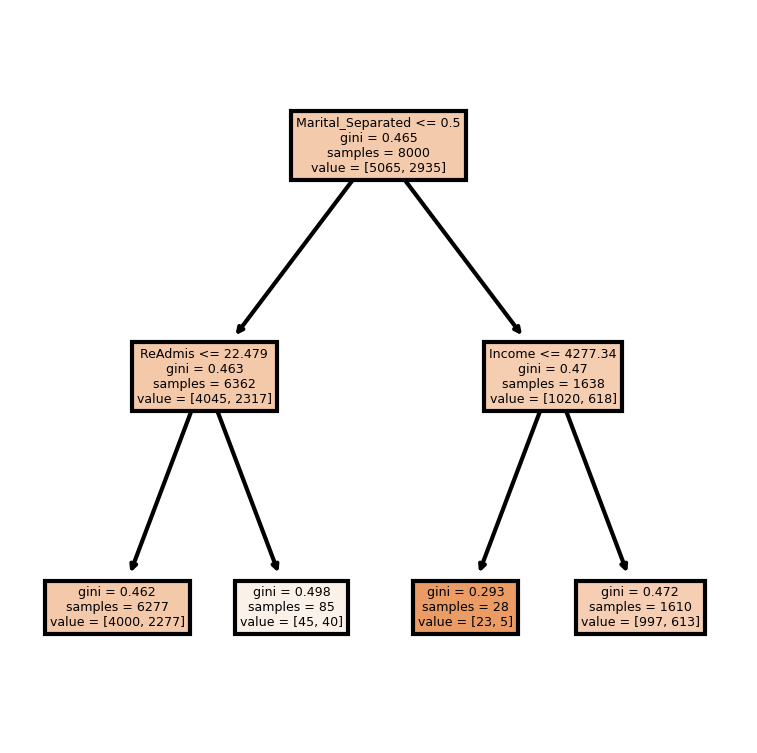

In [79]:
# Visualizes our decision tree as a .png file
# fig.savefig can be used to save a copy of the decisiont tree as a .png, etc.

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (3,3), dpi = 300)

tree.plot_tree(opt_tree, 
              feature_names = ['Children', 'Age', 'Income', 'ReAdmis', 'VitD_levels', 'HighBlood',
       'Stroke', 'Overweight', 'Diabetes', 'Hyperlipidemia', 'BackPain',
       'Anxiety', 'Asthma', 'Marital_Married', 'Marital_Never Married',
       'Marital_Separated', 'Marital_Widowed', 'Gender_Male',
       'Gender_Nonbinary', 'Initial_admin_Emergency Admission',
       'Initial_admin_Observation Admission', 'Complication_risk_Low',
       'Complication_risk_Medium'],
              filled = True)
# fig.savefig(r'C:\Users\caleb\OneDrive\Desktop\D209_model_files\optimizeddtree.png')
plt.show()

In [80]:
# x[int] (prior to naming) denotes variable placement in our columns list
# Our root node is calcuated as the independent variable that best seperates our data
# Leftmost arrows/branches under a node denote a Yes/True step
# Rightward arrows/branches under a node denote a No/False step
# "gini" represents data "impurity" on a 0-.5 scale, where 0 is minimal and 0.5 random assignment of classification
# "samples" represents training sample size
# "value" represents the number of sample items in each class